In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import tensorflow as tf

seed = 2023
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.experimental.numpy.random.seed(seed)
os.environ["TF_CUDNN_DETERMINISTIC"] = "1"
os.environ["TF_DETERMINISTIC_OPS"] = "1"
# Set a fixed value for the hash seed
os.environ["PYTHONHASHSEED"] = str(seed)
import dolfin as df
import time
from utils_training import *
from utils import *
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable

sns.set_theme()
sns.set_context("paper")
sns.set(rc={"xtick.bottom": True, "ytick.left": True})
colors = sns.color_palette("mako").as_hex()
my_cmap = sns.color_palette("viridis", as_cmap=True)
%load_ext autoreload
%autoreload 2

Invalid MIT-MAGIC-COOKIE-1 key

In [2]:
def test_domain_and_border(i):
    phi = tf.constant(np.load("./data_8733/Phi.npy"), dtype=tf.float32)[i]
    domain, boundary = domain_and_border(np.shape(phi)[0], phi)
    plt.figure(figsize=(6, 3))
    ax1 = plt.subplot(121)
    img = plt.imshow(phi, cmap="RdBu", origin="lower")

    divider = make_axes_locatable(ax1)
    cax = divider.append_axes("bottom", size="5%", pad=0.3)
    ax1.grid(False)
    ax1.set_xticks([])
    ax1.set_xticks([])
    ax1.set_title(r"$\phi$", fontsize=15)
    plt.colorbar(img, cax=cax, orientation="horizontal")

    ax2 = plt.subplot(122)
    img = plt.imshow(domain, cmap="RdBu", vmin=-1.5, vmax=1.45, origin="lower")
    divider = make_axes_locatable(ax2)
    cax = divider.append_axes("bottom", size="5%", pad=0.3)
    ax2.grid(False)
    ax2.set_xticks([])
    ax2.set_xticks([])
    ax2.set_title(r"$\Omega = \{\phi <0 \}$", fontsize=15)
    plt.colorbar(img, cax=cax, orientation="horizontal")
    plt.savefig(f"./images/level_set_domains_{i}.png")
    plt.show()


[943, 484, 1089, 711]


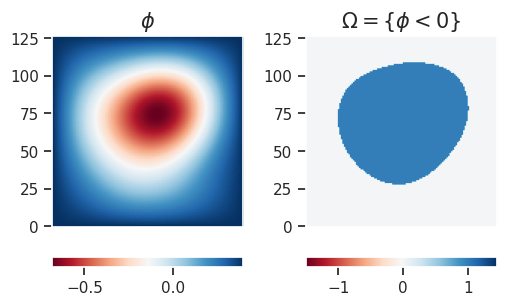

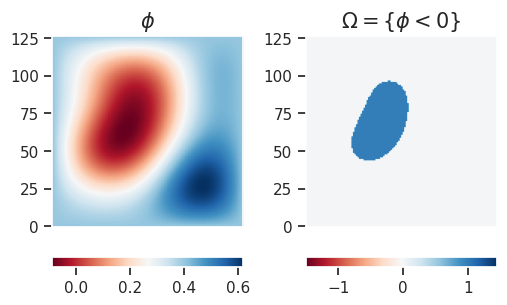

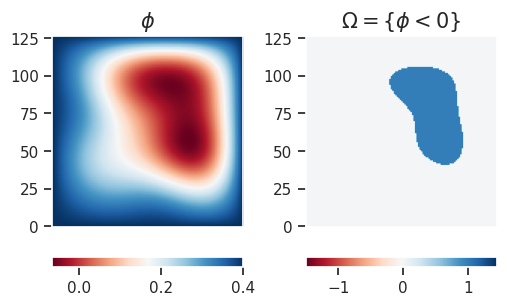

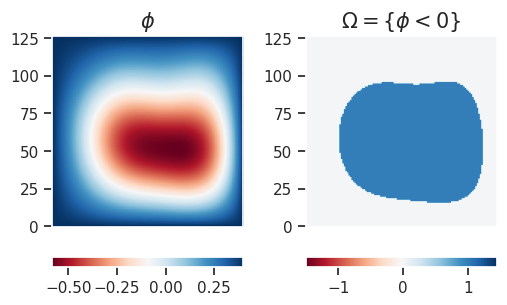

In [13]:
indices = np.random.choice(np.array(list(range(0, 1972))), 4)
indices = [943, 484, 1089, 711]

print(indices)
for i in indices:
    test_domain_and_border(i)
